<a href="https://colab.research.google.com/github/susichao/ml-project/blob/main/detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pushbullet.py
!pip install tldextract
!pip install scapy
!pip install configparser

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.6/97.6 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 16.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scapy: filename=scapy-2.5.0-py2.py3-none-any.whl size=1444327 sha256=aa562dfd3a7e0924e4019e52f1114c205430c579830709dfc5fe865b30107b1d
  Stored in directory: /root/.cache/pip/wheels/82/b7/03/8344d8cf6695624746311bc0d389e9d05535ca83c35f90241d
Successfully built scapy


In [2]:
import os
import pandas as pd
import numpy as np
import tldextract
import scipy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from pandas import DataFrame
import numpy as np
import sklearn
%matplotlib inline

In [3]:
legit_dataframe = pd.read_csv("/content/sample_data/legit_websites.csv", header=0)

In [4]:
# Editing techniques that should be done when domain logs come in raw form:

'''
import tldextract

def domain_extract(domain):
    ext = tldextract.extract(domain)
    if (not ext.suffix):
        return np.nan
    else:
        #print(ext)
        return ext.domain
'''

'''
legit_dataframe['domain'] = [domain_extract(domain) for domain in legit_dataframe['domain']]
del legit_dataframe['value']
'''

display(legit_dataframe)

,class,domain
0,legit,plasticbags
1,legit,mzltrack
2,legit,miss-slim
3,legit,myhostingpack
4,legit,download-by-satoshi
...,...,...
337393,legit,studiomonocromo
337394,legit,webdesk
337395,legit,bingtorrent
337396,legit,classicfilmtvcafe


In [5]:
legit_dataframe = legit_dataframe.dropna()
legit_dataframe = legit_dataframe.drop_duplicates()
#legit_dataframe['domain'] = legit_dataframe['domain'].map(lambda x: x.replace('-',''))

In [6]:
display(legit_dataframe)

,class,domain
0,legit,plasticbags
1,legit,mzltrack
2,legit,miss-slim
3,legit,myhostingpack
4,legit,download-by-satoshi
...,...,...
337393,legit,studiomonocromo
337394,legit,webdesk
337395,legit,bingtorrent
337396,legit,classicfilmtvcafe


In [7]:
# If we use Cross Validation, of course, there is no need for this.
# We can try the combination option, it won't reselect the previously selected indexes.

legit_dataframe = legit_dataframe.reindex(np.random.permutation(legit_dataframe.index))
legit_total = legit_dataframe.shape[0]
print('Total Legit domains %d' % legit_total)
display(legit_dataframe)


Total Legit domains 337337


,class,domain
68040,legit,bukvaved
83074,legit,mediker
333376,legit,superlovers-anime
240325,legit,cpeonline
209484,legit,fkis
...,...,...
276833,legit,mishrainfotech
60550,legit,shpl
107780,legit,bremen-tourismus
120178,legit,lienbangtravel


In [8]:
file_location = "/content/sample_data/dga_websites.csv"

dga_dataframe = pd.read_csv(file_location, header=0);

In [9]:
display(dga_dataframe)

,class,domain
0,dga,mortiscontrastatim
1,dga,cvyh1po636avyrsxebwbkn7
2,dga,txumyqrubwutbb
3,dga,ixekrihagimau
4,dga,rjyuosmhfnaedlyg
...,...,...
337495,dga,poeguvtsixuriem
337496,dga,fkmmnlmdokedddmn
337497,dga,cwnhlchfhcqrgass
337498,dga,mwxquxbokithpn


In [10]:
# To separate the uppercase or .com/.org/.info parts:

'''
dga_dataframe2 = dga_dataframe[["raw_domain"]]
#dga_dataframe2.head()
type(dga_dataframe2)

dga_dataframe2['lower_domain'] = dga_dataframe2.applymap(lambda x: x.split('.')[0].strip().lower())

'''

'\ndga_dataframe2 = dga_dataframe[["raw_domain"]]\n#dga_dataframe2.head()\ntype(dga_dataframe2)\n\ndga_dataframe2[\'lower_domain\'] = dga_dataframe2.applymap(lambda x: x.split(\'.\')[0].strip().lower())\n\n'

In [11]:
# We clean missing values and duplicate values.

dga_dataframe = dga_dataframe.dropna()
dga_dataframe = dga_dataframe.drop_duplicates()
#dga_dataframe['domain'] = dga_dataframe['domain'].map(lambda x: x.replace('-',''))

In [12]:

dga_dataframe = dga_dataframe.reindex(np.random.permutation(dga_dataframe.index))
dga_total = dga_dataframe.shape[0]
print('Total DGA domains %d' % dga_total)
display(dga_dataframe)


Total DGA domains 337500


,class,domain
7881,dga,adfnakbefofbkanb
215823,dga,htiwgqrj
65924,dga,lyvytin
140533,dga,stqmlklo
269812,dga,wxhpdovlqrpnetrfu
...,...,...
36677,dga,ygpdublrrmevig
26078,dga,qdqd1vubox5h3vypwf16its
179480,dga,rqsztxvret
152138,dga,wrlmknfsxkrsxukeckax


In [13]:
all_domains = pd.concat([legit_dataframe, dga_dataframe], ignore_index=True)

In [14]:
display(all_domains)

,class,domain
0,legit,bukvaved
1,legit,mediker
2,legit,superlovers-anime
3,legit,cpeonline
4,legit,fkis
...,...,...
674832,dga,ygpdublrrmevig
674833,dga,qdqd1vubox5h3vypwf16its
674834,dga,rqsztxvret
674835,dga,wrlmknfsxkrsxukeckax


In [15]:
all_domains['length'] = [len(x) for x in all_domains['domain']]

In [16]:
display(all_domains)

,class,domain,length
0,legit,bukvaved,8
1,legit,mediker,7
2,legit,superlovers-anime,17
3,legit,cpeonline,9
4,legit,fkis,4
...,...,...,...
674832,dga,ygpdublrrmevig,14
674833,dga,qdqd1vubox5h3vypwf16its,23
674834,dga,rqsztxvret,10
674835,dga,wrlmknfsxkrsxukeckax,20


In [17]:

import math
from collections import Counter

def entropy(s):
    p, lns = Counter(s), float(len(s))
    return -sum( count/lns * math.log(count/lns, 2) for count in p.values())

all_domains['entropy'] = [entropy(x) for x in all_domains['domain']]



In [18]:
display(all_domains)

,class,domain,length,entropy
0,legit,bukvaved,8,2.750000
1,legit,mediker,7,2.521641
2,legit,superlovers-anime,17,3.572469
3,legit,cpeonline,9,2.725481
4,legit,fkis,4,2.000000
...,...,...,...,...
674832,dga,ygpdublrrmevig,14,3.521641
674833,dga,qdqd1vubox5h3vypwf16its,23,4.175736
674834,dga,rqsztxvret,10,2.921928
674835,dga,wrlmknfsxkrsxukeckax,20,3.484184


In [19]:
import sklearn.ensemble
from sklearn import feature_extraction

In [20]:
# If we want to do feature engineering with CountVectorizer in addition to TFIDF:

'''
legit_cv = sklearn.feature_extraction.text.CountVectorizer(analyzer='char', ngram_range=(3,5), min_df=1e-6, max_df=1.0)
legit_counts_matrix = legit_cv.fit_transform(legit_dataframe['domain'])
legit_counts = np.log10(legit_counts_matrix.sum(axis=0).getA1())
legit_ngrams_list = legit_cv.get_feature_names()
'''


# We are doing a feature weighting operation on the feature values in get_features_names. They have as much weight as a percentage of their overall presence in the dataset.
# all_domains['alexa_grams']= alexa_counts * legit_cv.transform(all_domains['domain']).T


"\nlegit_cv = sklearn.feature_extraction.text.CountVectorizer(analyzer='char', ngram_range=(3,5), min_df=1e-6, max_df=1.0)\nlegit_counts_matrix = legit_cv.fit_transform(legit_dataframe['domain'])\nlegit_counts = np.log10(legit_counts_matrix.sum(axis=0).getA1())\nlegit_ngrams_list = legit_cv.get_feature_names()\n"

In [21]:
file_location = "/content/sample_data/words.txt"

eng_dataframe = pd.read_csv(file_location, header=0, sep=' ');

In [22]:
eng_dataframe

,words
0,&c
1,'d
2,'em
3,'ll
4,'m
...,...
354979,zymurgy
354980,zythem
354981,zythum
354982,zyzzyva


In [23]:
eng_dataframe = eng_dataframe[eng_dataframe['words'].map(lambda x: str(x).isalpha())]
#eng_dataframe2 = eng_dataframe[eng_dataframe['words'].map(lambda x: str(x).isalpha())]

In [24]:
eng_dataframe

,words
45,a
50,aa
51,aaa
52,aah
53,aahed
...,...
354979,zymurgy
354980,zythem
354981,zythum
354982,zyzzyva


In [25]:
# We use it to discard the parts with spaces at the beginning or at the end, we can choose the letter or word to be stripped.

eng_dataframe = eng_dataframe.applymap(lambda x: str(x).strip().lower())

In [26]:
eng_dataframe = eng_dataframe.dropna()
eng_dataframe = eng_dataframe.drop_duplicates()
eng_dataframe

,words
45,a
50,aa
51,aaa
52,aah
53,aahed
...,...
354979,zymurgy
354980,zythem
354981,zythum
354982,zyzzyva


In [27]:
# CountVectorizer:

'''
eng_cv = sklearn.feature_extraction.text.CountVectorizer(analyzer='char', ngram_range=(3,5), min_df=1e-6, max_df=1.0)
eng_counts_matrix = eng_cv.fit_transform(eng_dataframe['words'])
eng_counts = np.log(eng_counts_matrix.sum(axis=0).getA1())
eng_ngrams_list = eng_cv.get_feature_names()
'''

"\neng_cv = sklearn.feature_extraction.text.CountVectorizer(analyzer='char', ngram_range=(3,5), min_df=1e-6, max_df=1.0)\neng_counts_matrix = eng_cv.fit_transform(eng_dataframe['words'])\neng_counts = np.log(eng_counts_matrix.sum(axis=0).getA1())\neng_ngrams_list = eng_cv.get_feature_names()\n"

In [28]:
# CountVectorizer:

'''
file_location = "/content/sample_data/words.txt"
turkish_dataframe = pd.read_csv(file_location, header=0, sep=' ');

turkish_dataframe = turkish_dataframe[turkish_dataframe['words'].map(lambda x: str(x).isalpha())]

turkish_dataframe = turkish_dataframe.dropna()
turkish_dataframe = turkish_dataframe.drop_duplicates()
'''


'''
turkish_cv = sklearn.feature_extraction.text.CountVectorizer(analyzer='char', ngram_range=(3,5), min_df=1e-4, max_df=1.0)
turkish_counts_matrix = turkish_cv.fit_transform(turkish_dataframe['words'])
turkish_counts = np.log10(turkish_counts_matrix.sum(axis=0).getA1())
turkish_ngrams_list = turkish_cv.get_feature_names()
'''

"\nturkish_cv = sklearn.feature_extraction.text.CountVectorizer(analyzer='char', ngram_range=(3,5), min_df=1e-4, max_df=1.0)\nturkish_counts_matrix = turkish_cv.fit_transform(turkish_dataframe['words'])\nturkish_counts = np.log10(turkish_counts_matrix.sum(axis=0).getA1())\nturkish_ngrams_list = turkish_cv.get_feature_names()\n"

In [29]:
# Creating features after calculations for CountVectorizer:

#all_domains['legit_cv'] = legit_counts * legit_cv.transform(all_domains['domain']).T

#all_domains['eng_cv'] = eng_counts * eng_cv.transform(all_domains['domain']).T

#all_domains['turkish_cv'] = turkish_counts * turkish_cv.transform(all_domains['domain']).T

In [32]:
# TFIDF:

from sklearn.feature_extraction.text import TfidfVectorizer

legit_websites_char_vectorizer = TfidfVectorizer(analyzer = 'char', ngram_range=(3,5), min_df=1e-6, max_df=1.0)
legit_websites_counts_matrix = legit_websites_char_vectorizer.fit_transform(legit_dataframe['domain'])
legit_websites_dict_counts = legit_websites_counts_matrix.sum(axis=0).getA1()
legit_websites_feature_names = legit_websites_char_vectorizer.get_feature_names_out()


all_domains['legit_websites_tfidf'] = legit_websites_dict_counts * legit_websites_char_vectorizer.transform(all_domains['domain']).T

#one_legit_websites_dict_counts = np.ones(legit_websites_dict_counts.shape)
#all_domains['legit_websites_tfidf'] = one_legit_websites_dict_counts * legit_websites_char_vectorizer.transform(all_domains['domain']).T



eng_word_char_vectorizer = TfidfVectorizer(analyzer = 'char', ngram_range=(3,5), min_df=1e-6, max_df=1.0)
eng_word_counts_matrix = eng_word_char_vectorizer.fit_transform(eng_dataframe['words'])
eng_word_dict_counts = eng_word_counts_matrix.sum(axis=0).getA1()
eng_word_feature_names = eng_word_char_vectorizer.get_feature_names_out()


all_domains['eng_word_tfidf'] = eng_word_dict_counts * eng_word_char_vectorizer.transform(all_domains['domain']).T

#one_eng_word_dict_counts = np.ones(eng_word_dict_counts.shape)
#all_domains['eng_word_tfidf'] = one_eng_word_dict_counts * eng_word_char_vectorizer.transform(all_domains['domain']).T



# If we want to create a feature with the data set consisting of Turkish words:

'''
turkish_word_char_vectorizer = TfidfVectorizer(analyzer = 'char', ngram_range=(3,5), min_df=1e-5, max_df=1.0)
turkish_word_counts_matrix = turkish_word_char_vectorizer.fit_transform(turkish_dataframe['words'])
turkish_word_dict_counts = np.log(turkish_word_counts_matrix.sum(axis=0).getA1())
turkish_word_feature_names = turkish_word_char_vectorizer.get_feature_names()


all_domains['turkish_word_tfidf'] = turkish_word_dict_counts * turkish_word_char_vectorizer.transform(all_domains['domain']).T
'''


# To assign values without Feature Weighting:

'''
one_dict_counts = np.ones(dict_counts_words.shape)
all_domains['tfidf']= one_dict_counts * eng_word_char_vectorizer.transform(all_domains['domain']).T
'''

"\none_dict_counts = np.ones(dict_counts_words.shape)\nall_domains['tfidf']= one_dict_counts * eng_word_char_vectorizer.transform(all_domains['domain']).T\n"

In [33]:
all_domains

,class,domain,length,entropy,legit_websites_tfidf,eng_word_tfidf
0,legit,bukvaved,8,2.750000,66.128728,113.796794
1,legit,mediker,7,2.521641,320.242303,306.784956
2,legit,superlovers-anime,17,3.572469,556.450958,948.195697
3,legit,cpeonline,9,2.725481,767.340585,371.734026
4,legit,fkis,4,2.000000,36.232384,41.575557
...,...,...,...,...,...,...
674832,dga,ygpdublrrmevig,14,3.521641,91.134557,100.695821
674833,dga,qdqd1vubox5h3vypwf16its,23,4.175736,48.950944,61.317729
674834,dga,rqsztxvret,10,2.921928,46.057998,118.136201
674835,dga,wrlmknfsxkrsxukeckax,20,3.484184,44.178442,53.715921


<Axes: xlabel='length'>

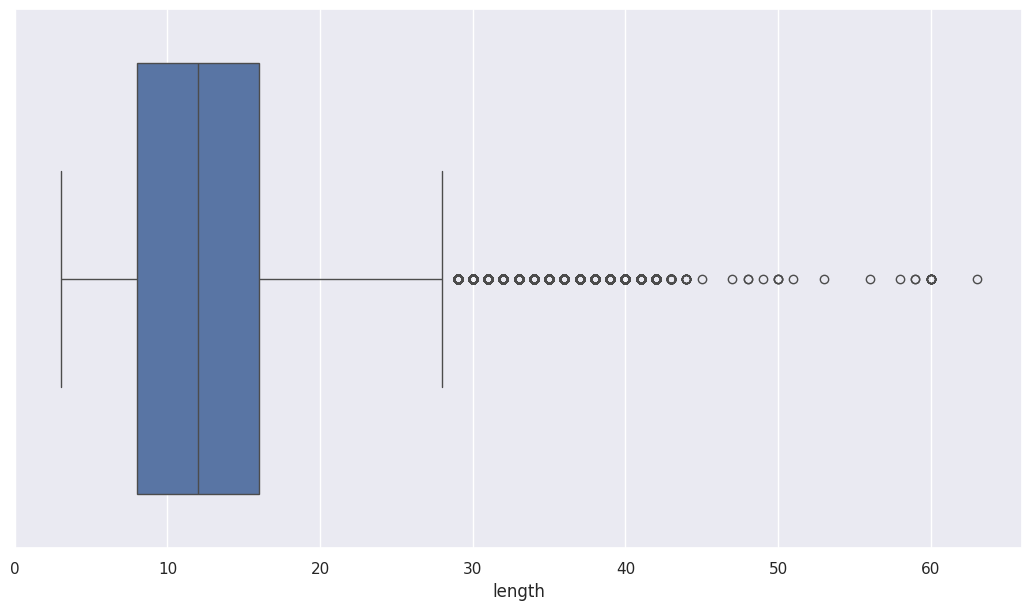

In [34]:
# Before outliers are removed:

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(13,7)})


sns.boxplot(x=all_domains['length'])

In [ ]:
sns.histplot(data=all_domains, x="length")

In [ ]:
sns.boxplot(x=all_domains['entropy'])

In [ ]:
sns.histplot(data=all_domains, x="entropy")

In [ ]:
sns.boxplot(x=all_domains['legit_websites_tfidf'])

In [ ]:
sns.histplot(data=all_domains, x="legit_websites_tfidf")

In [ ]:
sns.boxplot(x=all_domains['eng_word_tfidf'])

In [ ]:
sns.histplot(data=all_domains, x="eng_word_tfidf")

In [ ]:
#sns.boxplot(x=all_domains['turkish_word_tfidf'])

In [ ]:
#sns.histplot(data=all_domains, x="turkish_word_tfidf")

In [35]:

def outlier_thresholds(dataframe, col_name, q1=0.20, q3=0.80):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def remove_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    df_without_outliers = dataframe[~((dataframe[col_name] <= low_limit) | (dataframe[col_name] >= up_limit))]
    return df_without_outliers


all_domains = remove_outlier(all_domains, 'length')
all_domains = remove_outlier(all_domains, 'entropy')
all_domains = remove_outlier(all_domains, 'legit_websites_tfidf')
all_domains = remove_outlier(all_domains, 'eng_word_tfidf')

#all_domains = remove_outlier(all_domains, 'legit_cv')
#all_domains = remove_outlier(all_domains, 'eng_cv')
#all_domains = remove_outlier(all_domains, 'turkish_word_tfidf')


# To suppress outliers:
'''
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
'''

#replace_with_thresholds(all_domains, 'eng_word_tfidf')


'\ndef replace_with_thresholds(dataframe, variable):\n    low_limit, up_limit = outlier_thresholds(dataframe, variable)\n    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit\n    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit\n'

In [36]:
all_domains

,class,domain,length,entropy,legit_websites_tfidf,eng_word_tfidf
0,legit,bukvaved,8,2.750000,66.128728,113.796794
1,legit,mediker,7,2.521641,320.242303,306.784956
2,legit,superlovers-anime,17,3.572469,556.450958,948.195697
3,legit,cpeonline,9,2.725481,767.340585,371.734026
4,legit,fkis,4,2.000000,36.232384,41.575557
...,...,...,...,...,...,...
674832,dga,ygpdublrrmevig,14,3.521641,91.134557,100.695821
674833,dga,qdqd1vubox5h3vypwf16its,23,4.175736,48.950944,61.317729
674834,dga,rqsztxvret,10,2.921928,46.057998,118.136201
674835,dga,wrlmknfsxkrsxukeckax,20,3.484184,44.178442,53.715921


In [ ]:
sns.boxplot(x=all_domains['length'])

In [ ]:
sns.histplot(data=all_domains, x="length")

In [ ]:
sns.boxplot(x=all_domains['entropy'])

In [ ]:
sns.histplot(data=all_domains, x="entropy")

In [ ]:
#all_domains.groupby('length').count().plot.bar()
sns.boxplot(x=all_domains['legit_websites_tfidf'])

In [ ]:
sns.histplot(data=all_domains, x="legit_websites_tfidf")

In [ ]:
#If we want to do log transformation:

#np.log1p(all_domains['legit_websites_tfidf'.values]

#sns.histplot(data=all_domains, x=np.log1p(all_domains['legit_websites_tfidf'].values))

In [ ]:
sns.boxplot(x=all_domains['eng_word_tfidf'])

In [ ]:
sns.histplot(data=all_domains, x="eng_word_tfidf")

In [ ]:
#sns.boxplot(x=all_domains['turkish_word_tfidf'])

In [ ]:
#sns.histplot(data=all_domains, x="turkish_word_tfidf")

In [37]:
all_domains.groupby('class').agg({'length':['mean', 'min', 'max']})

length        
            mean min max
class                   
dga    13.462319   4  27
legit  10.567697   3  27

In [38]:
all_domains.groupby('class').agg({'entropy':['mean', 'min', 'max']})

entropy                    
           mean       min       max
class                              
dga    3.131282  1.378783  4.436605
legit  2.846514  1.378783  4.392747

In [39]:
all_domains.groupby('class').agg({'legit_websites_tfidf':['mean', 'min', 'max']})

legit_websites_tfidf                 
                      mean  min         max
class                                      
dga             108.336258  0.0  825.256167
legit           268.546090  1.0  825.722716

In [40]:
all_domains.groupby('class').agg({'eng_word_tfidf':['mean', 'min', 'max']})

eng_word_tfidf                  
                mean  min          max
class                                 
dga       151.326950  0.0  1046.531291
legit     336.810887  0.0  1046.657731

In [41]:
'''
# Standartlastirma:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

all_domains['ss_length'] = scaler.fit_transform(all_domains[['length']])
all_domains['ss_entropy'] = scaler.fit_transform(all_domains[['entropy']])
all_domains['ss_legit_websites_tfidf'] = scaler.fit_transform(all_domains[['legit_websites_tfidf']])
all_domains['ss_eng_word_tfidf'] = scaler.fit_transform(all_domains[['eng_word_tfidf']])
all_domains['ss_turkish_word_tfidf'] = scaler.fit_transform(all_domains[['turkish_word_tfidf']])
'''

"\n# Standartlastirma:\nfrom sklearn.preprocessing import StandardScaler\n\nscaler = StandardScaler()\n\nall_domains['ss_length'] = scaler.fit_transform(all_domains[['length']])\nall_domains['ss_entropy'] = scaler.fit_transform(all_domains[['entropy']])\nall_domains['ss_legit_websites_tfidf'] = scaler.fit_transform(all_domains[['legit_websites_tfidf']])\nall_domains['ss_eng_word_tfidf'] = scaler.fit_transform(all_domains[['eng_word_tfidf']])\nall_domains['ss_turkish_word_tfidf'] = scaler.fit_transform(all_domains[['turkish_word_tfidf']])\n"

In [ ]:
#sns.boxplot(x=all_domains['ss_legit_websites_tfidf'])

In [ ]:
#sns.histplot(data=all_domains, x='ss_legit_websites_tfidf')

In [42]:
'''
sc = MinMaxScaler((0, 1))
model_scaling = sc.fit_transform(model_df)
model_df=pd.DataFrame(model_scaling,columns=model_df.columns)
model_df.head()
'''


'''
# Normalizasyon:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

all_domains['mm_length'] = minmax_scaler.fit_transform(all_domains[['length']])
all_domains['mm_entropy'] = minmax_scaler.fit_transform(all_domains[['entropy']])
all_domains['mm_legit_websites_tfidf'] = minmax_scaler.fit_transform(all_domains[['legit_websites_tfidf']])
all_domains['mm_eng_word_tfidf'] = minmax_scaler.fit_transform(all_domains[['eng_word_tfidf']])
all_domains['mm_turkish_word_tfidf'] = minmax_scaler.fit_transform(all_domains[['turkish_word_tfidf']])
'''

"\n# Normalizasyon:\nfrom sklearn.preprocessing import MinMaxScaler\n\nminmax_scaler = MinMaxScaler()\n\nall_domains['mm_length'] = minmax_scaler.fit_transform(all_domains[['length']])\nall_domains['mm_entropy'] = minmax_scaler.fit_transform(all_domains[['entropy']])\nall_domains['mm_legit_websites_tfidf'] = minmax_scaler.fit_transform(all_domains[['legit_websites_tfidf']])\nall_domains['mm_eng_word_tfidf'] = minmax_scaler.fit_transform(all_domains[['eng_word_tfidf']])\nall_domains['mm_turkish_word_tfidf'] = minmax_scaler.fit_transform(all_domains[['turkish_word_tfidf']])\n"

In [ ]:
#sns.boxplot(x=all_domains['mm_legit_websites_tfidf'])

In [ ]:
#sns.histplot(data=all_domains, x='mm_legit_websites_tfidf')

In [43]:
all_domains.loc[all_domains["class"] == "dga", "class"] = 1
all_domains.loc[all_domains["class"] == "legit", "class"] = 0

In [44]:
all_domains

,class,domain,length,entropy,legit_websites_tfidf,eng_word_tfidf
0,0,bukvaved,8,2.750000,66.128728,113.796794
1,0,mediker,7,2.521641,320.242303,306.784956
2,0,superlovers-anime,17,3.572469,556.450958,948.195697
3,0,cpeonline,9,2.725481,767.340585,371.734026
4,0,fkis,4,2.000000,36.232384,41.575557
...,...,...,...,...,...,...
674832,1,ygpdublrrmevig,14,3.521641,91.134557,100.695821
674833,1,qdqd1vubox5h3vypwf16its,23,4.175736,48.950944,61.317729
674834,1,rqsztxvret,10,2.921928,46.057998,118.136201
674835,1,wrlmknfsxkrsxukeckax,20,3.484184,44.178442,53.715921


In [45]:
# Random Forest
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, validation_curve

rf_model = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

X = all_domains[['length', 'entropy', 'legit_websites_tfidf', 'eng_word_tfidf']]
y = np.array(all_domains['class'].tolist())
# y = all_domains['class'].to_numpy()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
rf_model.score(X_test,y_test)*100


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[86273 12245]
 [19944 77314]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84     98518
           1       0.86      0.79      0.83     97258

    accuracy                           0.84    195776
   macro avg       0.84      0.84      0.84    195776
weighted avg       0.84      0.84      0.84    195776

0.8355825024517817


In [46]:

'''
rf_params = {#"max_depth": [2, 3, 5, 7, None],
             #"min_samples_split": [2, 5, 10, 15],
             "n_estimators": [50, 100]}


rf_best_grid = GridSearchCV(rf_model, rf_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)

rf_best_grid.best_params_

rf_final = rf_model.set_params(**rf_best_grid.best_params_).fit(X, y)

cv_results = cross_validate(rf_final, X, y, cv=5, scoring=["accuracy", "roc_auc", "f1", "recall", "precision"])

print(cv_results['test_accuracy'].mean())
print(cv_results['test_roc_auc'].mean())
print(cv_results['test_f1'].mean())
print(cv_results['test_recall'].mean())
print(cv_results['test_precision'].mean())
'''


'\nrf_params = {#"max_depth": [2, 3, 5, 7, None],\n             #"min_samples_split": [2, 5, 10, 15],\n             "n_estimators": [50, 100]}\n\n\nrf_best_grid = GridSearchCV(rf_model, rf_params, cv=5, n_jobs=-1, verbose=True).fit(X, y)\n\nrf_best_grid.best_params_\n\nrf_final = rf_model.set_params(**rf_best_grid.best_params_).fit(X, y)\n\ncv_results = cross_validate(rf_final, X, y, cv=5, scoring=["accuracy", "roc_auc", "f1", "recall", "precision"])\n\nprint(cv_results[\'test_accuracy\'].mean())\nprint(cv_results[\'test_roc_auc\'].mean())\nprint(cv_results[\'test_f1\'].mean())\nprint(cv_results[\'test_recall\'].mean())\nprint(cv_results[\'test_precision\'].mean())\n'

In [47]:
#rf_best_grid.best_params_

In [48]:

import collections, numpy


counter = collections.Counter(y_train)
print(counter)

counter2 = collections.Counter(y_test)
print(counter2)


Counter({0: 229076, 1: 227732})
Counter({0: 98518, 1: 97258})


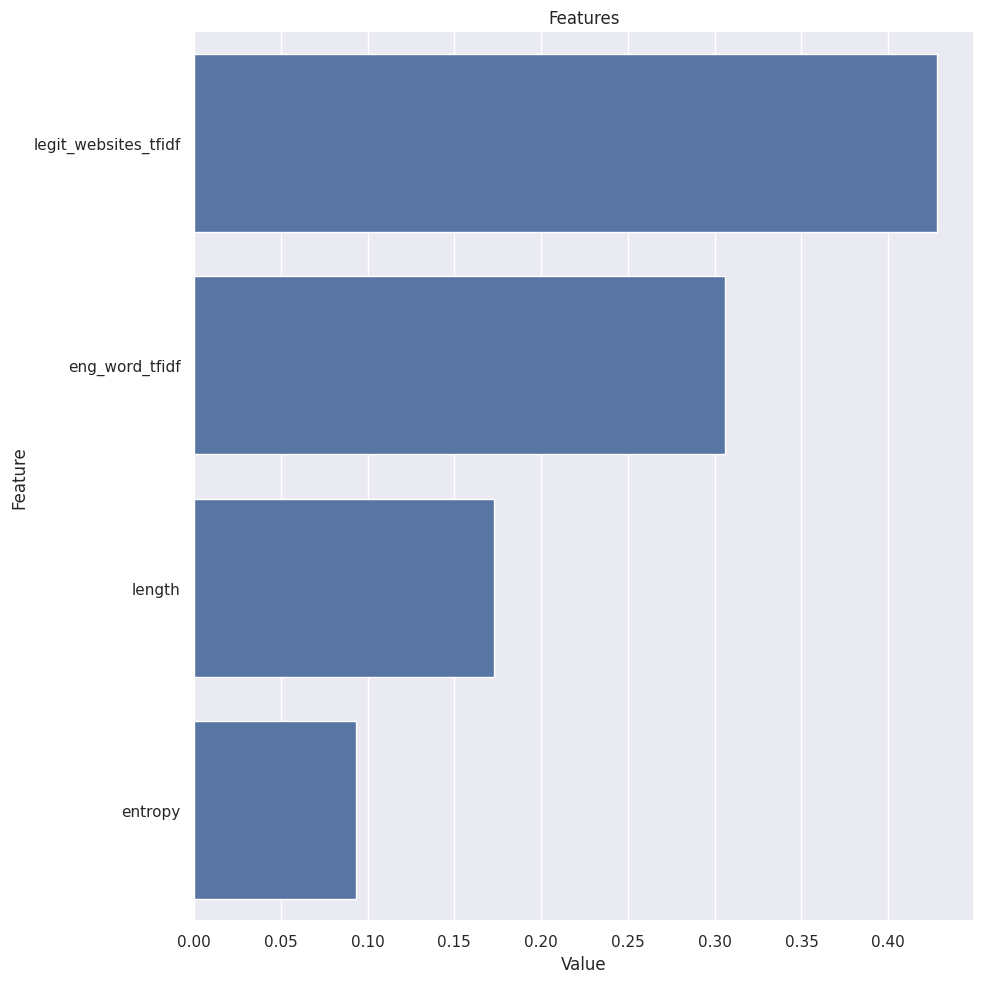

'\ndef val_curve_params(model, X, y, param_name, param_range, scoring="roc_auc", cv=5):\n    train_score, test_score = validation_curve(\n        model, X=X, y=y, param_name=param_name, param_range=param_range, scoring=scoring, cv=cv)\n\n    mean_train_score = np.mean(train_score, axis=1)\n    mean_test_score = np.mean(test_score, axis=1)\n\n    plt.plot(param_range, mean_train_score,\n             label="Training Score", color=\'b\')\n\n    plt.plot(param_range, mean_test_score,\n             label="Validation Score", color=\'g\')\n\n    plt.title(f"Validation Curve for {type(model).__name__}")\n    plt.xlabel(f"Number of {param_name}")\n    plt.ylabel(f"{scoring}")\n    plt.tight_layout()\n    plt.legend(loc=\'best\')\n    plt.show(block=True)\n\nval_curve_params(rf_final, X, y, "n_estimators", range(0, 75), scoring="roc_auc")\n'

In [49]:

def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

plot_importance(rf_model, X)


'''
def val_curve_params(model, X, y, param_name, param_range, scoring="roc_auc", cv=5):
    train_score, test_score = validation_curve(
        model, X=X, y=y, param_name=param_name, param_range=param_range, scoring=scoring, cv=cv)

    mean_train_score = np.mean(train_score, axis=1)
    mean_test_score = np.mean(test_score, axis=1)

    plt.plot(param_range, mean_train_score,
             label="Training Score", color='b')

    plt.plot(param_range, mean_test_score,
             label="Validation Score", color='g')

    plt.title(f"Validation Curve for {type(model).__name__}")
    plt.xlabel(f"Number of {param_name}")
    plt.ylabel(f"{scoring}")
    plt.tight_layout()
    plt.legend(loc='best')
    plt.show(block=True)

val_curve_params(rf_final, X, y, "n_estimators", range(0, 75), scoring="roc_auc")
'''

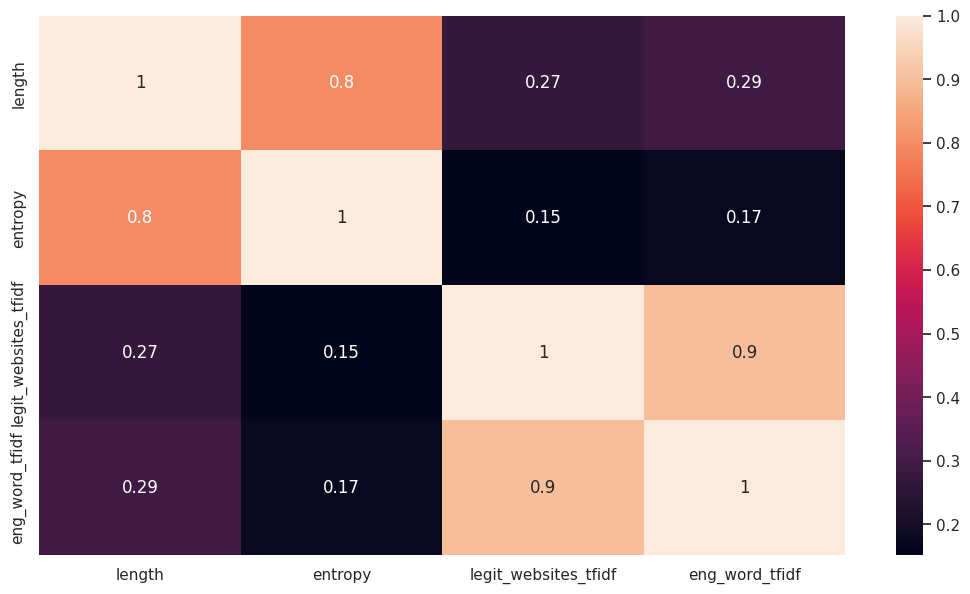

In [52]:
numeric_columns = all_domains.select_dtypes(include=["number"]).columns
all_domains_numeric = all_domains[numeric_columns]
corrMatrix = all_domains_numeric.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [56]:
def dga_detect(domain):
    legit_websites_tfidf_match = np.array([legit_websites_dict_counts * legit_websites_char_vectorizer.transform([domain]).T])
    eng_word_tfidf_match = np.array([eng_word_dict_counts * eng_word_char_vectorizer.transform([domain]).T])

    _X = np.array([[len(domain), entropy(domain), legit_websites_tfidf_match[0][0], eng_word_tfidf_match[0][0]]])
    #print('%s : %s' % (domain, rf_model.predict([_X])[0]))
    #print(type(_X))
    #print(_X)
    print([_X][0])
    #return str(rf_model.predict([_X])[0])
    #return str(rf_final.predict([_X])[0])

    # DataFrame is expected in predict function i.e. 2D array. Since _X is in a list structure, it is a 1D array.
    return str(rf_model.predict(_X)[0])

print(dga_detect('miuul'))

[[ 5.          1.92192809 14.97301094 10.48170682]]
0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [57]:
# LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression


log_model = LogisticRegression()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
log_model.score(X_test,y_test)*100


print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))


[[82830 15353]
 [19325 78268]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.83     98183
           1       0.84      0.80      0.82     97593

    accuracy                           0.82    195776
   macro avg       0.82      0.82      0.82    195776
weighted avg       0.82      0.82      0.82    195776

0.8228689931350115


In [58]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
knn_model.score(X_test,y_test)*100


print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))


[[84370 13845]
 [20526 77035]]
              precision    recall  f1-score   support

           0       0.80      0.86      0.83     98215
           1       0.85      0.79      0.82     97561

    accuracy                           0.82    195776
   macro avg       0.83      0.82      0.82    195776
weighted avg       0.83      0.82      0.82    195776

0.8244371118012422


In [59]:
all_domains['class'].value_counts()

class
0    327594
1    324990
Name: count, dtype: int64

In [60]:
legit_dataframe['domain'].shape

(337337,)

In [61]:
dga_dataframe['domain'].shape

(337500,)

In [62]:
all_domains[all_domains['eng_word_tfidf'] == 0]

,class,domain,length,entropy,legit_websites_tfidf,eng_word_tfidf
94,0,cdwb,4,2.000000,2.115693,0.0
116,0,ip-192-99-10,12,2.625815,6.851751,0.0
181,0,fb5,3,1.584963,1.119015,0.0
189,0,acv,3,1.584963,6.946720,0.0
234,0,jk725,5,2.321928,1.482243,0.0
...,...,...,...,...,...,...
674698,1,fswv,4,2.000000,3.404199,0.0
674724,1,xkqvfnq,7,2.521641,0.776278,0.0
674735,1,pqtvnvf,7,2.521641,7.486567,0.0
674800,1,cdmqkc,6,2.251629,3.393765,0.0


In [63]:
all_domains[all_domains['legit_websites_tfidf'] == 0].shape

(37, 6)

In [64]:
all_domains[all_domains['legit_websites_tfidf'] < 0]

,class,domain,length,entropy,legit_websites_tfidf,eng_word_tfidf


In [65]:
all_domains[all_domains['eng_word_tfidf'] < 0]

,class,domain,length,entropy,legit_websites_tfidf,eng_word_tfidf


In [66]:
all_domains.describe().T

,count,mean,std,min,25%,50%,75%,max
length,652584.0,12.009233,4.751534,3.000000,8.000000,12.000000,16.000000,27.000000
entropy,652584.0,2.988330,0.475540,1.378783,2.725481,3.022055,3.323231,4.436605
legit_websites_tfidf,652584.0,188.760816,169.852550,0.000000,46.340335,134.235647,300.137465,825.722716
eng_word_tfidf,652584.0,244.438986,228.945492,0.000000,58.137034,174.834778,376.426899,1046.657731


In [ ]:

plt.figure(figsize=(15,8))

sns.scatterplot(x=all_domains['legit_websites_tfidf'], y=all_domains['eng_word_tfidf'],
                hue=all_domains['class'])
plt.show()


In [ ]:

plt.figure(figsize=(15,8))

sns.scatterplot(x=all_domains['legit_websites_tfidf'], y=all_domains['entropy'],
                hue=all_domains['class'])
plt.show()


In [ ]:

plt.figure(figsize=(15,8))

sns.scatterplot(x=all_domains['eng_word_tfidf'], y=all_domains['entropy'],
                hue=all_domains['class'])
plt.show()


In [67]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)
gb_model.score(X_test,y_test)*100

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))


[[88388  9720]
 [20203 77465]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.86     98108
           1       0.89      0.79      0.84     97668

    accuracy                           0.85    195776
   macro avg       0.85      0.85      0.85    195776
weighted avg       0.85      0.85      0.85    195776

0.8471569548872181


In [68]:
import xgboost
from xgboost import XGBClassifier


xgb_model = XGBClassifier()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
xgb_model.score(X_test,y_test)*100

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))


[[89194  9331]
 [19776 77475]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86     98525
           1       0.89      0.80      0.84     97251

    accuracy                           0.85    195776
   macro avg       0.86      0.85      0.85    195776
weighted avg       0.86      0.85      0.85    195776

0.8513249836547891


In [75]:
import pickle

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Save the trained model to a file
with open('xgb_model.pkl', 'wb') as file:
    pickle.dump(xgb_model, file)

In [76]:
import xgboost as xgb

# Train the XGBoost model
xgb_model.fit(X_train, y_train)

# Save the trained model to a file
xgb_model.save_model('xgb_model.bin')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [16:58:47] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


In [70]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 10.6 MB/s eta 0:00:00


In [71]:
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(iterations=10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
cat_model.fit(X_train, y_train)
y_pred = cat_model.predict(X_test)
cat_model.score(X_test,y_test)*100

#print(confusion_matrix(y_test,y_pred))
#print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))


Learning rate set to 0.5
0:	learn: 0.5003360	total: 84.7ms	remaining: 762ms
1:	learn: 0.4306636	total: 120ms	remaining: 480ms
2:	learn: 0.3974149	total: 155ms	remaining: 361ms
3:	learn: 0.3804529	total: 191ms	remaining: 287ms
4:	learn: 0.3705701	total: 225ms	remaining: 225ms
5:	learn: 0.3648205	total: 259ms	remaining: 173ms
6:	learn: 0.3612198	total: 295ms	remaining: 126ms
7:	learn: 0.3579796	total: 330ms	remaining: 82.6ms
8:	learn: 0.3555368	total: 363ms	remaining: 40.3ms
9:	learn: 0.3542430	total: 407ms	remaining: 0us
0.8445723684210527


In [72]:
# If we want using log transformation:

all_domains['log_legit_websites_tfidf'] = np.log1p(all_domains['legit_websites_tfidf'])
all_domains['log_eng_word_tfidf'] = np.log1p(all_domains['eng_word_tfidf'])

In [73]:
all_domains.describe().T

,count,mean,std,min,25%,50%,75%,max
length,652584.0,12.009233,4.751534,3.000000,8.000000,12.000000,16.000000,27.000000
entropy,652584.0,2.988330,0.475540,1.378783,2.725481,3.022055,3.323231,4.436605
legit_websites_tfidf,652584.0,188.760816,169.852550,0.000000,46.340335,134.235647,300.137465,825.722716
eng_word_tfidf,652584.0,244.438986,228.945492,0.000000,58.137034,174.834778,376.426899,1046.657731
log_legit_websites_tfidf,652584.0,4.672218,1.260537,0.000000,3.857363,4.907019,5.707567,6.717469
log_eng_word_tfidf,652584.0,4.782345,1.565063,0.000000,4.079857,5.169545,5.933377,6.954312


In [74]:
# Random Forest
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, validation_curve

rf_model = sklearn.ensemble.RandomForestClassifier(n_estimators=100)

X = all_domains[['length', 'entropy', 'log_legit_websites_tfidf', 'log_eng_word_tfidf']]
y = np.array(all_domains['class'].tolist())
# y = all_domains['class'].to_numpy()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
rf_model.score(X_test,y_test)*100


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[86127 12183]
 [19736 77730]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84     98310
           1       0.86      0.80      0.83     97466

    accuracy                           0.84    195776
   macro avg       0.84      0.84      0.84    195776
weighted avg       0.84      0.84      0.84    195776

0.8369616296175221
